ベースディレクトリと、出力ディレクトリを設定します。

In [1]:
############################################
BaseDir   = 'IntroDDSJpn/Chap00/'
OutputDir = '0Python-sklearn/'

Google Colabかどうかを判別し、このJupyter Notebookのあるディレクトリを特定します。

In [2]:
############################################
import sys
import os
############################################
def IsGoogleColab():
  if 'google.colab' in sys.modules:
    return True
  else:
    return False
############################################
if IsGoogleColab():
  #
  from google.colab import drive
  drive.mount('/content/drive')
  #
  IpynbDir = 'drive/My Drive/Colab Notebooks/' + BaseDir
else:
  #
  IpynbDir =  os.getcwd() + '/'
############################################
print( 'ipynb file path = %s' % IpynbDir )
############################################
# 出力先のフォルダ(ディレクトリ)を準備
FilePath = IpynbDir + OutputDir
print( 'FilePath = %s' % FilePath )
#
if( True != os.path.isdir(FilePath) ):
    print('  making %s' % FilePath )
    os.mkdir(FilePath)
else:
    print(' %s is exist.' % FilePath )

ipynb file path = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap00/
FilePath = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap00/0Python-sklearn/
  making d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap00/0Python-sklearn/


NumPy: Pythonで数値計算や配列を効率的に行うためのパッケージ
* https://numpy.org/
* NumPy Reference: https://numpy.org/doc/stable/reference/index.html

Matplotlib: Python/NumPyのためのグラフ描画パッケージ
* https://matplotlib.org/
* API Reference: https://matplotlib.org/stable/api/index

In [3]:
############################################
import numpy as np
import numpy.random as rd
print('numpy      Ver.', np.__version__)
############################################
# Python/NumPyのためのグラフ描画パッケージ
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print('matplotlib Ver.', mpl.__version__)

numpy      Ver. 1.26.4
matplotlib Ver. 3.9.2


sklearn: Pythonのための機械学習パッケージ
* https://scikit-learn.org/
* https://scikit-learn.org/stable/modules/classes.html

In [4]:
############################################
# Pythonのための機械学習パッケージ
import sklearn as skl
import sklearn.linear_model as lm
print('sklearn    Ver.', skl.__version__)

sklearn    Ver. 1.5.2


In [5]:
############################################
# データ点数
M = 400
#
# 時間軸のデータ
tt = np.linspace(0.0, +8.0E-12, endpoint=False, num=M)
#
# psスケールの時間軸
tt_ps = tt * 1.0E+12
#
# 時間ステップ
dt = (np.amax(tt) - np.amin(tt))/(M-1.0)
print('dt =',dt)
#
# 周波数ステップ
df = 1.0 / (M*dt)
print('df =',df)
#
# 最大周波数
fmax = 1.0 /(2.0 * dt)
print('fmax =', fmax)
#
# 周波数軸のデータ
ff = np.linspace(0.0, fmax, endpoint=True, num=int(M/2+1) )
#
# THzスケールの周波数軸
ff_THz = ff / 1.0E12
#
ff_k = ff.size

dt = 2e-14
df = 125000000000.0
fmax = 25000000000000.0


In [6]:
############################################
# デモデータに含まれる周波数成分
f_1     = 2.91E12  # Hz
f_1_THz = f_1/1.0E12
w_1     = 2.0 * np.pi * f_1
tau_1   = 4.35E-12 # sec
a_1     = -9.35E-7
b_1     = -0.493E-7
#
f_2     = 2.07E12  # Hz
f_2_THz = f_2/1.0E12
w_2     = 2.0 * np.pi * f_2
tau_2   = 1.96E-12 # sec
a_2     = +0.218E-7
b_2     = +3.53E-7
############################################
# 真値のデータ
y_true = np.exp( -tt/tau_1 ) * (a_1 * np.cos( w_1 * tt ) + b_1 * np.cos( w_1 * tt ) ) + \
         np.exp( -tt/tau_2 ) * (a_2 * np.cos( w_2 * tt ) + b_2 * np.cos( w_2 * tt ) )
############################################
# デモデータとして、ノイズの重畳したデータ
sigma_noise = 2.0E-7
y_data = y_true + sigma_noise * rd.randn(M).reshape(M,)
############################################
grf_y_scale_log = 6
grf_y_scale     = 10**grf_y_scale_log

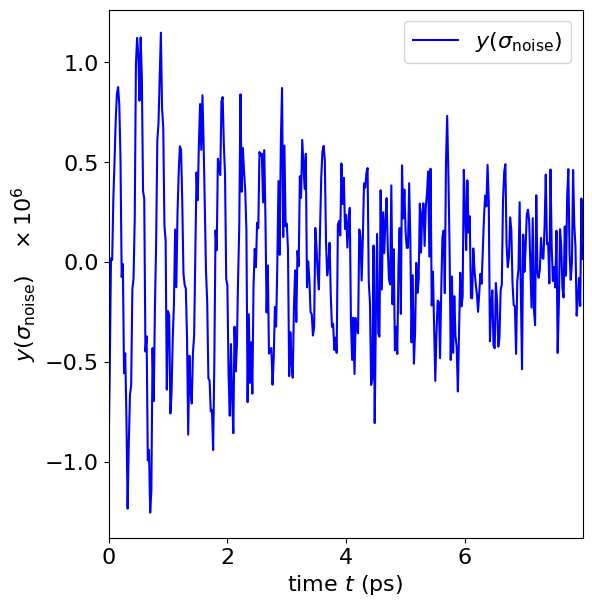

In [7]:
############################################
# データのグラフ
plt.rcParams["font.size"] = 16
#
fig = plt.figure(figsize=(6,6))
#
fig.subplots_adjust(left=0.19, right=0.98, top=0.98, bottom=0.1, wspace=0.25)
#
####################
####################
ax1 = fig.add_subplot(1,1,1)
####################
xmin = np.amin( tt_ps )
xmax = np.amax( tt_ps )
####################
ax1.set_xlim( xmin, xmax )
ax1.set_xlabel(r'time $t$ (ps)')
#
####################
ymax = np.amax( y_data )
ymin = np.amin( y_data )
ybot = +1.1 * ymin * grf_y_scale
ytop = +1.1 * ymax * grf_y_scale
ax1.set_ylim(ybot, ytop)
ax1.set_ylabel( r'$y(\sigma_{\rm{}noise})$'+ r'$\quad \times10^{%d}$' % grf_y_scale_log )
#
####################
ax1.plot(tt_ps, y_data * grf_y_scale, color='blue', label=r'$y(\sigma_{\rm{}noise})$' )
#
####################
ax1.legend(loc='upper right')
#
plt.show()
#
fig.savefig( FilePath + 'DumpedTwoMode-y-01' )

In [8]:
############################################
# フーリエ変換
fft_y_scale_log = 6
fft_y_scale     = 10**fft_y_scale_log
############################################
fft_y_data = np.fft.rfft( y_data )
fft_y_data_re  = np.real( fft_y_data )
fft_y_data_im  = np.imag( fft_y_data )
fft_y_data_mag = np.abs( fft_y_data )
fft_y_data_ang = np.angle( fft_y_data ) / np.pi * 180.0
fft_y_data_umag = fft_y_data_mag * fft_y_scale

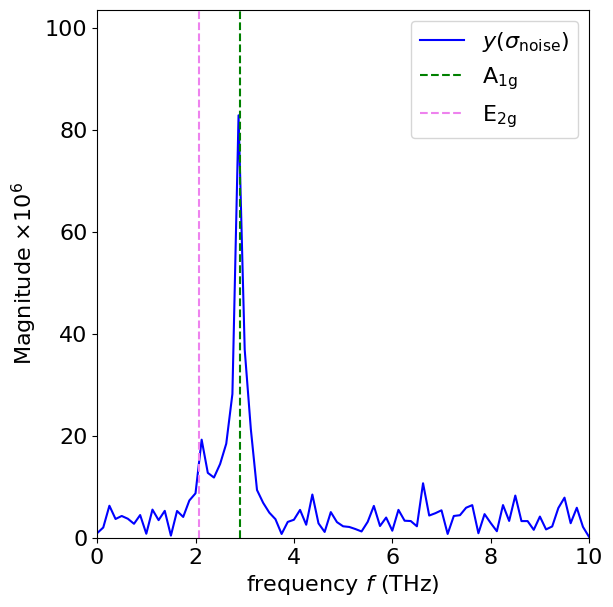

In [9]:
############################################
# データのFFTグラフ
plt.rcParams["font.size"] = 16
#
fig = plt.figure(figsize=(6,6))
#
fig.subplots_adjust(left=0.15, right=0.97, top=0.98, bottom=0.1, wspace=0.25)
#
####################
####################
ax1 = fig.add_subplot(1,1,1)
####################
xmin = np.amin( ff_THz )
xmax = np.amax( ff_THz )
####################
ax1.set_xlim( 0, 10 )
# ax1.set_xlim( xmin, xmax )
ax1.set_xlabel(r'frequency $f$ (THz)')
#
####################
ymax = np.amax( fft_y_data_umag )
ybot = 0.0
ytop = +1.25 * ymax
ax1.set_ylim(ybot, ytop)
ax1.set_ylabel('Magnitude '+ r'$\times10^{%d}$' % fft_y_scale_log )
#
####################
ax1.plot(ff_THz, fft_y_data_umag, color='blue', label=r'$y(\sigma_{\rm{}noise})$' )

####################
ax1.vlines(f_1_THz, ybot, ytop, linestyle='dashed',color='green', label=r'${\rm{}A}_{\rm{}1g}$')
ax1.vlines(f_2_THz, ybot, ytop, linestyle='dashed',color='violet',label=r'${\rm{}E}_{\rm{}2g}$')

####################
plt.legend(loc='upper right')
####################
plt.show()

#
fig.savefig( FilePath + 'DumpedTwoMode-fft-01' )


In [10]:
############################################
# FFTの計画行列
############################################
ff2pi = 2.0 * np.pi * ff
print('ff2pi.size =', ff2pi.size)
#
ff2pi_K = ff2pi.size - 1 # omit f=0
#
# k=0: DC,
# k=1: sin(df), sin(2df), ...
# cos(df), cos(2df), ...
#
w_K = 1 + (ff_k - 1) * 2
print('w_K =', w_K)
#
XX = np.zeros( (M,w_K))
#
# DC
XX[:,0] = 1.0
# sin
for k in range(ff2pi_K):
    kk = k + 1
    freq = ff2pi[ kk ]
    kksin = kk
    kkcos = kk + ff2pi_K
    XX[:, kksin ] = np.sin( freq * tt )
    XX[:, kkcos ] = np.cos( freq * tt )
#
print(XX.shape)

ff2pi.size = 201
w_K = 401
(400, 401)


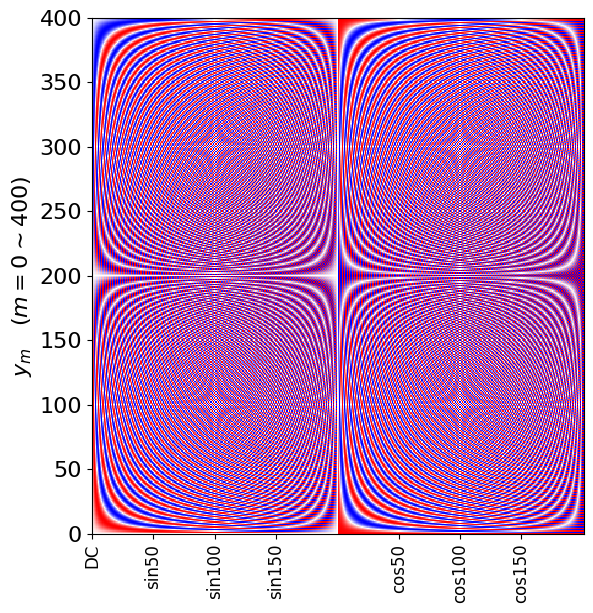

In [11]:
############################################
# 計画行列のヒートマップ
############################################
plt.rcParams["font.size"] = 16
#
fig = plt.figure(figsize=(6,6))
#
fig.subplots_adjust(left=0.15, right=0.97, top=0.98, bottom=0.12, wspace=0.25)
#
####################
####################
ax1 = fig.add_subplot(1,1,1)
#
heatmap = ax1.pcolor(XX, cmap=plt.cm.bwr)
#
ax1.set_ylabel(r'$y_{m}\quad(m=0\sim$' + '%d' % M + r'$)$' )
#
ax1.set_xticks([0,
                50,
                100,
                150,
                ff2pi_K+50,
                ff2pi_K+100,
                ff2pi_K+150])
ax1.set_xticklabels(['DC',
                     'sin50',
                     'sin100',
                     'sin150',
                     'cos50',
                     'cos100',
                     'cos150'],
                    rotation=90,
                   fontsize=12)

plt.show()
#
fig.savefig( FilePath + 'DumpedTwoMode-DesignMatrix-01' )

In [12]:
############################################
def get_l0norm( coef ):
    l0norm = 0
    if( coef[0] != 0.0 ):
        l0norm = l0norm + 1
    for k in range( ff2pi_K ):
        kk = k + 1
        kksin = kk
        kkcos = kk + ff2pi_K
        if ( (coef[kksin] != 0.0)| \
             (coef[kkcos] != 0.0) ):
            l0norm = l0norm + 1
    return(l0norm)

############################################
def sp_coef_abs( coef ):
    coef_abs = np.zeros(ff2pi.size)
    # DC
    coef_abs[0] = coef[0]
    # sin, cos
    for k in range(ff2pi_K):
        kk = k + 1
        kksin = kk
        kkcos = kk + ff2pi_K
        coef_abs[kk] = np.sqrt( \
                        coef[kksin]**2 + \
                        coef[kkcos]**2 )
    return(coef_abs)

In [13]:
############################################
y_target            = y_data
y_target_noise      = sigma_noise
y_target_title      = r'$y(\sigma_{\rm{}noise})$'
y_target_norm_title = r'$\tilde{y}(\sigma_{\rm{}noise})$'
fft_y_target_umag = fft_y_data_umag
############################################
y_target_normfactor = np.std(y_target)
y_target_norm       = y_target / \
                      y_target_normfactor
y_target_norm_noise = y_target_noise/ \
                    y_target_normfactor
print( 'y_target_norm = ' +
       '%.5f' % np.amin( y_target_norm ) +
       ' ~ ' +
       '%.5f' % np.amax( y_target_norm ) +
     ' (noise=%.5f)' % y_target_norm_noise )

y_target_norm = -2.97721 ~ 2.72862 (noise=0.47524)


In [14]:
############################################
n_alphas = 50 # 200
min_alphas = -3
max_alphas = 0

# alphas = np.logspace(-10, -2, n_alphas)
alphas = np.logspace(min_alphas,
                     max_alphas,
                     n_alphas)[::-1]
print(alphas)
#
alphas_min=np.amin(alphas)
alphas_max=np.amax(alphas)

[1.         0.86851137 0.75431201 0.65512856 0.5689866  0.49417134
 0.42919343 0.37275937 0.32374575 0.28117687 0.24420531 0.21209509
 0.184207   0.15998587 0.13894955 0.12067926 0.10481131 0.09102982
 0.07906043 0.06866488 0.05963623 0.05179475 0.04498433 0.0390694
 0.03393222 0.02947052 0.02559548 0.02222996 0.01930698 0.01676833
 0.01456348 0.01264855 0.01098541 0.00954095 0.00828643 0.00719686
 0.00625055 0.00542868 0.00471487 0.00409492 0.00355648 0.00308884
 0.0026827  0.00232995 0.00202359 0.00175751 0.00152642 0.00132571
 0.0011514  0.001     ]


In [15]:
############################################
coefs        = []
coefs_umag   = []
coefs_abs    = []
l0norm       = []
y_target_std = []
#
for a in alphas:
    #
    lasso = lm.Lasso(alpha=a,
                     fit_intercept=False)
    lasso.fit(XX, y_target_norm)
    #
    coef = lasso.coef_ * y_target_normfactor
    #
    y_res = XX @ coef
    #
    coefs.append( coef )
    coefs_umag.append( coef * fft_y_scale )
    #
    coef_abs = np.zeros(ff2pi.size)
    # DC
    coef_abs[0] = coef[0]
    # sin, cos
    for k in range(ff2pi_K):
        kk = k + 1
        kksin = kk
        kkcos = kk + ff2pi_K
        coef_abs[kk] = np.sqrt( \
                        coef[kksin]**2 + \
                        coef[kkcos]**2 )
    coefs_abs.append(coef_abs*fft_y_scale)
    #
    l0norm.append(get_l0norm(lasso.coef_))
    #
    residual = (y_res - y_target) * \
               grf_y_scale
    y_target_std.append( np.std(residual) )

print(np.shape(alphas))
print(np.shape(coefs))
print(np.shape(coefs_abs))
print(np.shape(y_target_std))
print(np.amax(y_target_std))
print(np.amin(y_target_std))

(50,)
(50, 401)
(50, 201)
(50,)
0.4208404880357912
0.011723940882491013


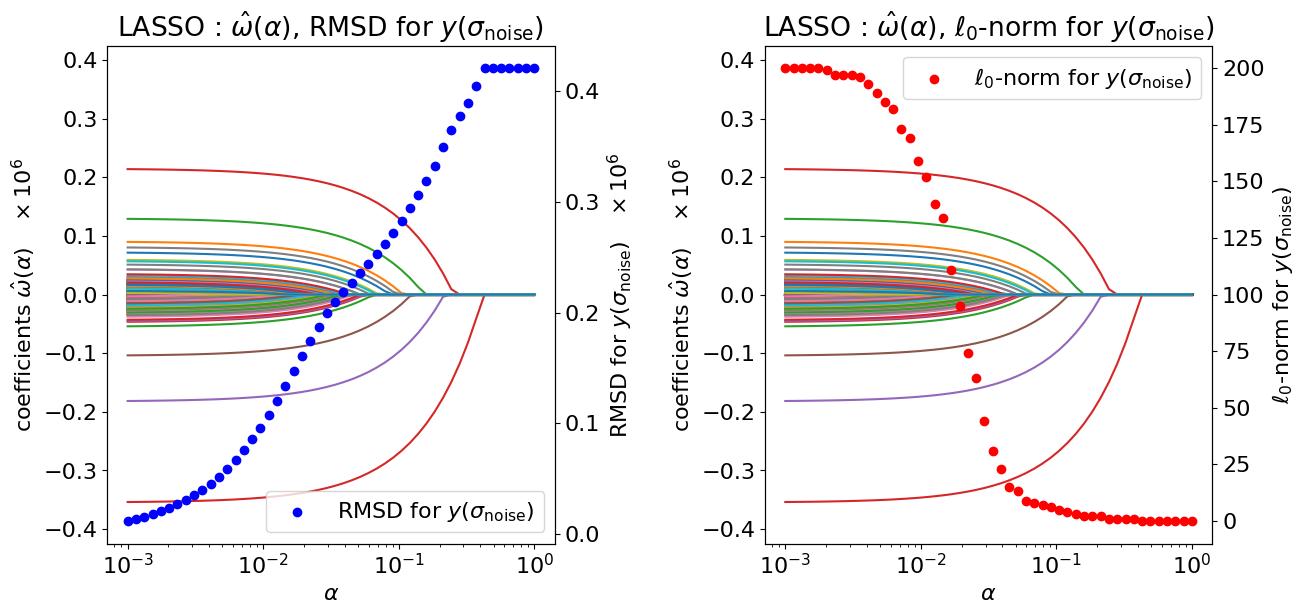

In [16]:
############################################
plt.rcParams["font.size"] = 16
#
fig = plt.figure(figsize=(13,6))
#
fig.subplots_adjust(left=0.08, right=0.93, top=0.93, bottom=0.1, wspace=0.47)
########################
ax1 = fig.add_subplot(1,2,1)
############
ax1.set_xscale('log')
ax1.set_xlabel(r'$\alpha$')
############
coefs_umag_max = np.amax( (np.abs(np.amax(coefs_umag)), np.abs(np.amin(coefs_umag)) ) )
y_bot = -1.2 * coefs_umag_max
y_top = +1.2 * coefs_umag_max
ax1.set_ylim( y_bot, y_top )
ax1.set_ylabel('coefficients '+ r'$\hat{\omega}(\alpha)$'+ r'$\quad\times10^{%d}$' % fft_y_scale_log)
############
ax1.plot(alphas, coefs_umag )
########################
ax1r = ax1.twinx()
############
ax1r.set_ylabel('RMSD for '+ y_target_title + r'$\quad\times10^{%d}$' % grf_y_scale_log)
############
ax1r.scatter(alphas, y_target_std, label='RMSD for '+ y_target_title, color='blue' )
############
plt.legend(loc='lower right')
############
plt.title('LASSO : ' + r'$\hat{\omega}(\alpha)$'+ ', RMSD for '+y_target_title)

########################
ax2 = fig.add_subplot(1,2,2)
############
ax2.set_xscale('log')
ax2.set_xlabel(r'$\alpha$')
############
ax2.set_ylim( y_bot, y_top )
ax2.set_ylabel('coefficients '+ r'$\hat{\omega}(\alpha)$'+ r'$\quad\times10^{%d}$' % fft_y_scale_log)
############
ax2.plot(alphas, coefs_umag )
########################
ax2r = ax2.twinx()
############
ax2r.set_ylabel(r'$\ell_{0}$-norm for '+ y_target_title)
############
ax2r.scatter(alphas, l0norm, label=r'$\ell_{0}$-norm for '+ y_target_title, color='red' )
############
plt.legend(loc='upper right')
############
plt.title( 'LASSO : ' + r'$\hat{\omega}(\alpha)$'+ r', $\ell_{0}$-norm for '+ y_target_title)

############
plt.show()

####################
fig.savefig( FilePath + "DumpedTwoMode-Lasso-01")